# Test Ontobee SPARQL endpoint

uses <a href="https://github.com/paulovn/sparql-kernel">sparql-kernel</a>

default options:

In [8]:
# %lsmagics
# Modify output format
# Don't show more than 80 results (event if more are fetched)
%show 80

# Request whatever format is appropriate for the query type
%format default

# Activate table output
%display table

Result maximum size: 80
Return format: DEFAULT
Display: table

<h3>Simple <span style="color:green;font-weight: bold;">SELECT</span> query : Select classes and labels from an OBO ontology</h3>

<span style="color:green;font-weight: bold;">FROM</span>: choose the ontology

In [23]:
%endpoint http://sparql.hegroup.org/sparql/
%display table

PREFIX obo-term: <http://purl.obolibrary.org/obo/>
SELECT DISTINCT ?x ?label
FROM <http://purl.obolibrary.org/obo/merged/TO>
WHERE
{
?x rdfs:subClassOf obo-term:TO_0000387.
?x rdfs:label  ?label.
}

Endpoint set to: http://sparql.hegroup.org/sparql/
Display: table

x,label
http://purl.obolibrary.org/obo/TO_0000164,stress trait
http://purl.obolibrary.org/obo/TO_0000357,plant growth and development trait
http://purl.obolibrary.org/obo/TO_0000392,sterility or fertility trait
http://purl.obolibrary.org/obo/TO_0000597,quality trait
http://purl.obolibrary.org/obo/TO_0000133,stature or vigor trait
http://purl.obolibrary.org/obo/TO_0000017,plant morphology trait
http://purl.obolibrary.org/obo/TO_0000371,yield trait
http://purl.obolibrary.org/obo/TO_0000183,other miscellaneous trait
http://purl.obolibrary.org/obo/TO_0000277,biochemical trait


<h3>Construct example</h3>

Endpoint set to: http://sparql.hegroup.org/sparql/
Display: svg

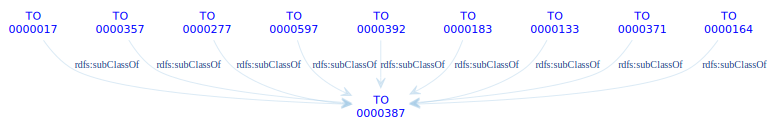

In [12]:
%endpoint http://sparql.hegroup.org/sparql/
%display diagram

PREFIX obo-term: <http://purl.obolibrary.org/obo/>
CONSTRUCT 
{
    ?x rdfs:subClassOf obo-term:TO_0000387 .
}
FROM <http://purl.obolibrary.org/obo/merged/TO>
WHERE
{
    ?x rdfs:subClassOf obo-term:TO_0000387.
    ?x rdfs:label  ?label.
} LIMIT 20

<h3>Test sparql 1.1</h3>
THE ONTOBEE SPARQL ENPOINT DOES NOT SEEM TO SUPPORT SPARQL 1.1 FEATURES

In [19]:
%endpoint http://sparql.hegroup.org/sparql/
%display table

PREFIX obo-term: <http://purl.obolibrary.org/obo/>
CONSTRUCT 
{
    ?x rdfs:label ?label .
}
FROM <http://purl.obolibrary.org/obo/merged/TO>
WHERE
{
    ?x rdfs:subClassOf* obo-TO_0000608 .
    ?x rdfs:label  ?label.
}

Endpoint set to: http://sparql.hegroup.org/sparql/
Display: table

Error: SPARQL error: QueryBadFormed: a bad request has been sent to the endpoint, probably the sparql query is bad formed. 

Response:
b'37000 Error SP030: SPARQL compiler, line 9: syntax error at \'*\' before \'obo\'\n\nSPARQL query:\ndefine output:format "HTTP+TTL text/rdf+n3" PREFIX obo-term: <http://purl.obolibrary.org/obo/>\nCONSTRUCT\n{\n?x rdfs:label ?label .\n}\nFROM <http://purl.obolibrary.org/obo/merged/TO>\nWHERE\n{\n?x rdfs:subClassOf* obo-TO_0000608 .\n?x rdfs:label  ?label.\n}'

<h3>Federated query</h3>
NOT SUPPORTED. SPARQL 1.1 FEATURE

In [21]:
endpoint http://sparql.hegroup.org/sparql/
%display table

PREFIX obo-term: <http://purl.obolibrary.org/obo/>
SELECT ?poterm ?polabel 
FROM <http://purl.obolibrary.org/obo/merged/PO>
WHERE
{
    ?x rdf:type owl:class .
    ?x rdfs:label  ?label.
    SERVICE <http://purl.obolibrary.org/obo/merged/TO> {
        ?to ?p ?poterm
    }
}LIMIT 10



Error: SPARQL error: QueryBadFormed: a bad request has been sent to the endpoint, probably the sparql query is bad formed. 

Response:
b"37000 Error SP030: SPARQL compiler, line 0: Invalid character in SPARQL expression at '%'\n\nSPARQL query:\nendpoint http://sparql.hegroup.org/sparql/\n%display table\n\nPREFIX obo-term: <http://purl.obolibrary.org/obo/>\nSELECT ?poterm ?polabel \nFROM <http://purl.obolibrary.org/obo/merged/PO>\nWHERE\n{\n    ?x rdf:type owl:class .\n    ?x rdfs:label  ?label.\n    SERVICE <http://sparql.hegroup.org/sparql/> {\n        ?to ?p ?poterm\n    }\n}LIMIT 10\n\n"